In [133]:
import pandas as pd
import numpy as np

df: pd.DataFrame = pd.read_excel("../../../Explainerdashboard/forest_explainer_tesis/datasets/regression/auto_mpg/dataset_auto_mpg.xlsx")
#df: pd.DataFrame = pd.read_csv("importances.ipynb")

In [134]:
import joblib
from sklearn.ensemble import RandomForestClassifier

random_forest_model: RandomForestClassifier = joblib.load(
    "../../../Explainerdashboard/forest_explainer_tesis/datasets/regression/auto_mpg/auto_mpg.joblib")

In [77]:

for target_value in list(set(df['Sobreviviente'])):
    X_train = df[df['Sobreviviente'] == target_value].drop(columns='Sobreviviente')


    # Identificar ejemplos prototipo
    prototypes = []
    n = 0
    for i in range(X_train.shape[0]):
        if n < 3:
            if max(random_forest_model.predict_proba(X_train[i:i+1] )[0]) > 0.9:
                prototypes.append(X_train[i:i+1])
                n+=1
        else:
            n=0
            break

    print('PROTOTIPOS PERFECTOS PARA: ', target_value)
    for example in prototypes:
        print('Ejemplo:', example.index[0])
        print('Probabilidad:', max(random_forest_model.predict_proba(example)[0]))
        print()
    print()
    print('PROTOTIPOS DUDOSOS PARA: ', target_value)
    for example in doubtful:
        print('Ejemplo:', example.index[0])
        print('Probabilidad:', max(random_forest_model.predict_proba(example)[0]))
        print()
    print()

[0, 1]
x_train:  (424, 5)
PROTOTIPOS PERFECTOS PARA:  0

PROTOTIPOS DUDOSOS PARA:  0
Ejemplo: 5
Probabilidad: 0.6255798073686595

Ejemplo: 6
Probabilidad: 0.6696551077811534

Ejemplo: 13
Probabilidad: 0.5460612380022828


x_train:  (290, 5)
PROTOTIPOS PERFECTOS PARA:  1

PROTOTIPOS DUDOSOS PARA:  1
Ejemplo: 2
Probabilidad: 0.5274836156675101

Ejemplo: 7
Probabilidad: 0.5593891840698708

Ejemplo: 9
Probabilidad: 0.5994338411935805




In [95]:
print(list(set(df['Sobreviviente'])))

for target_value in list(set(df['Sobreviviente'])):
    X_train = df[df['Sobreviviente'] == target_value].drop(columns='Sobreviviente')


    #print(X_train)
    print('x_train: ', X_train.shape)
    # Identificar ejemplos prototipo
    prototypes = []
    n = 0
    for i in range(X_train.shape[0]):
        if n < 3:
            if max(random_forest_model.predict_proba(X_train[i:i+1] )[0]) > 0.9:
                prototypes.append(X_train[i:i+1])
                n+=1
        else:
            n=0
            break

    # Identificar ejemplos dudosos
    doubtful = []
    for i in range(X_train.shape[0]):
        if n < 3:
            if max(random_forest_model.predict_proba(X_train[i:i+1])[0]) < 0.55:
                doubtful.append(X_train[i:i+1])
                n+=1
        else:
            n=0
            break
        
    prototipos = {}

    print('PROTOTIPOS PERFECTOS PARA: ', target_value)
    prototipos[f'PROTOTIPOS PERFECTOS PARA: {target_value}'] = { 'Ejemplo': [], 'Probabilidad': []}
    for example in prototypes:
        print('Ejemplo:', example.index[0])
        prototipos[f'PROTOTIPOS PERFECTOS PARA: {target_value}']['Ejemplo'].append(example)
        print('Probabilidad:', max(random_forest_model.predict_proba(example)[0]))
        prototipos[f'PROTOTIPOS PERFECTOS PARA: {target_value}']['Probabilidad'].append(max(random_forest_model.predict_proba(example)[0]))
        print()
    print()
    print('PROTOTIPOS DUDOSOS PARA: ', target_value)
    prototipos[f'PROTOTIPOS DUDOSOS PARA: {target_value}'] = { 'Ejemplo': [], 'Probabilidad': []}
    for example in doubtful:
        print('Ejemplo:', example)
        prototipos[f'PROTOTIPOS DUDOSOS PARA: {target_value}']['Ejemplo'].append(example)
        print('Probabilidad:', max(random_forest_model.predict_proba(example)[0]))
        prototipos[f'PROTOTIPOS DUDOSOS PARA: {target_value}']['Probabilidad'].append(max(random_forest_model.predict_proba(example)[0]))
        print()
    print()

    print('prototipos: ', prototipos)

    dataframe_test: pd.DataFrame = pd.DataFrame(prototipos[f'PROTOTIPOS DUDOSOS PARA: {target_value}'])

dataframe_test

[0, 1]
x_train:  (424, 5)
PROTOTIPOS PERFECTOS PARA:  0

PROTOTIPOS DUDOSOS PARA:  0
Ejemplo:     Clase  Genero  Edad  HermEsp  PadHij
13      3       1  14.0        0       0
Probabilidad: 0.5460612380022828

Ejemplo:     Clase  Genero  Edad  HermEsp  PadHij
16      3       1  31.0        1       0
Probabilidad: 0.5265831625143629

Ejemplo:     Clase  Genero  Edad  HermEsp  PadHij
21      3       1   8.0        3       1
Probabilidad: 0.5234206889843466


prototipos:  {'PROTOTIPOS PERFECTOS PARA: 0': {'Ejemplo': [], 'Probabilidad': []}, 'PROTOTIPOS DUDOSOS PARA: 0': {'Ejemplo': [    Clase  Genero  Edad  HermEsp  PadHij
13      3       1  14.0        0       0,     Clase  Genero  Edad  HermEsp  PadHij
16      3       1  31.0        1       0,     Clase  Genero  Edad  HermEsp  PadHij
21      3       1   8.0        3       1], 'Probabilidad': [np.float64(0.5460612380022828), np.float64(0.5265831625143629), np.float64(0.5234206889843466)]}}
x_train:  (290, 5)
PROTOTIPOS PERFECTOS PARA:  1

,Ejemplo,Probabilidad
0,Clase Genero Edad HermEsp PadHij 2 ...,0.527484
1,Clase Genero Edad HermEsp PadHij 22 ...,0.525894
2,Clase Genero Edad HermEsp PadHij 30 ...,0.549420


X_train[0]:     cylinders  displacement  horsepower  weight  acceleration   model year  \
0          8         307.0         130    3504          12.0           70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
{'grid_values': [array([1918.1       , 1943.81616162, 1969.53232323, 1995.24848485,
       2020.96464646, 2046.68080808, 2072.3969697 , 2098.11313131,
       2123.82929293, 2149.54545455, 2175.26161616, 2200.97777778,
       2226.69393939, 2252.41010101, 2278.12626263, 2303.84242424,
       2329.55858586, 2355.27474747, 2380.99090909, 2406.70707071,
       2432.42323232, 2458.13939394, 2483.85555556, 2509.57171717,
       2535.28787879, 2561.0040404 , 2586.72020202, 2612.43636364,
       2638.15252525, 2663.86868687, 2689.58484848, 2715.3010101 ,
       2741.01717172, 2766.73333333, 2792.44949495, 2818.16565657,
       2843.88181818, 2869.5979798 , 2895.31414141, 2921.03030303,
       2946.74646465, 2972.46262626, 2998.17878788, 3023.89494949,


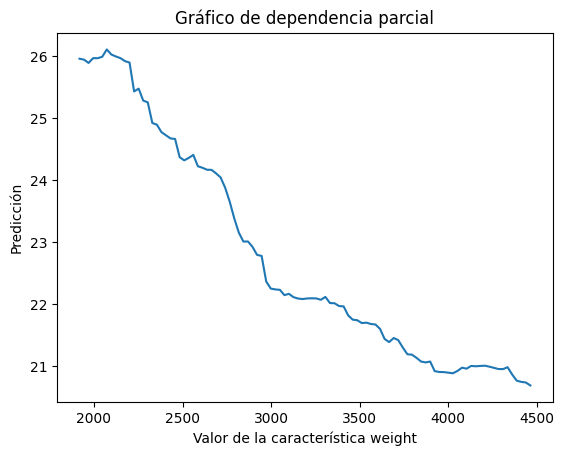

In [140]:
from sklearn.inspection import partial_dependence 
import matplotlib.pyplot as plt

X_train = df.drop(columns='mpg')
print('X_train[0]: ', X_train[0:1])

# Seleccionar la característica específica

feature_idx = 3


# Calcular la dependencia parcial

dependence = partial_dependence(random_forest_model, X_train, [feature_idx])

print(dependence)
partial_dependence_values = dependence['average']
axes = dependence['grid_values']
# Generar el gráfico

plt.plot(axes[0], partial_dependence_values[0])

plt.xlabel("Valor de la característica {}".format(X_train.columns[feature_idx]))

plt.ylabel("Predicción")

plt.title("Gráfico de dependencia parcial")

plt.show()

In [141]:
lista = [1,2,4]

lista.index(4)

2